### Vehicle Dataset Analysis Overview

**Objective:**  
Analyze vehicle data to identify factors affecting fleet operations, enabling Taabi to improve cost efficiency and uptime through real-time insights. The analysis will focus on uncovering patterns in fuel efficiency, engine health, and driver behavior, helping to pinpoint areas where improvements can be made to optimize fleet performance.

**Goals:**
- **Data Understanding:** Assess the structure, types, and quality of the dataset.
- **Data Cleaning:** Handle missing values, correct data types, and remove outliers.
- **Exploratory Data Analysis (EDA):** Identify trends and relationships within the data, using visualizations to support findings.
- **Feature Engineering:** Create new features and normalize data as needed.
- **Insights & Recommendations:** Provide key insights and actionable steps to enhance vehicle performance and operational efficiency.

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Reading the dataset - Vehicle Dataset

In [3]:
# load the dataset
ds = pd.read_excel('vehicle_dataset.xlsx')

In [4]:
# inspect the first few rows
ds.head()

,uniqueid,ts,lat,lng,external_bat_voltage,internal_bat_voltage,engineload,tanklevel,throttle,coolant,intakeairtemp,engineoiltemp,imap,vehiclespeed,warmups,rpm,obddistance,maf,fuelrail,runtime,mil,obdstandards,telltale,pto_drive_engagement,engine_torque_percent,service_distance,gross_combination_vehicle_weight,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,vehicle_weight,air_suspension_pressure_front_axle_left,air_suspension_pressure_front_axle_right,air_suspension_pressure_rear_axle_left,air_suspension_pressure_rear_axle_right,state_of_charge,battery_pack_voltage,battery_pack_current,power,pluscode,lamp_status,hydraulic_oil_filter,air_filter,no_charging,low_fuel,engine_temp_high,hydraulic_oil_temp_high,water_in_fuel,low_oil_pressure,roller_speed,vibration_status,axle_position,tire_position,tire_pressure,tire_temperature,tire_air_leakage_rate,tire_sensor_enable_status,tire_status,tire_sensor_electric_fault,extended_tire_pressure_support,tire_pressure_threshold_detection,extended_tire_pressure,cpc_system_type,required_tire_pressure,cpc_tire_id,cpc_graphical_position,cpc_tire_location,cpc_ttm_id,barometric_pressure,secondary_air_status,catalyst_temperature_bank1_sensor1,catalyst_temperature_bank1_sensor2,distance_since_mil,commanded_egr,egr_error,drive_cycle_status,ambient_air_temperature,fuel_system_status,short_term_fuel_trim_bank_1,long_term_fuel_trim_bank_1,timing_advance,oxygen_sensors_present,oxygen_sensor_1_voltage,oxygen_sensor_2_voltage,commanded_evaporative_purge,control_module_voltage,absolute_load_value,relative_throttle_position,oxygen_sensor_1_short_term_fuel_trim,oxygen_sensor_2_short_term_fuel_trim,can_raw_data,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,engine_airlet_pressure,engine_oil_pressure,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,engine_pto_switch_status,clientid,alerttype,alertvalue,from_ts,to_ts,server_ts,to_lat,to_lng,tripid,alert_completed,view_status,scheduled_start_loc,scheduled_end_loc,vehiclenumber,areaandroute,type,breached_in_userid,alerted_to_in_userid,breached_out_userid,alerted_to_out_userid,alert_generated_by_app_userid,alert_ended_by_app_userid,request_id,live_location,to_be_expired_at,status,event_id,particulated_trap_inlet_pressure,boost_pressure,intake_manifold_1_temperature,air_inlet_pressure,exhaust_gas_temperature,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,NaN,NaN,28,NaN,NaN,33,NaN,1774.9688,NaN,0.00000,NaN,749.000,60780800,NaN,NaN,1970.85,NaN,NaN,NaN,NaN,21,NaN,NaN,130,0,17935.5,23.6,86.14,5.30,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7JFW3994+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0CF00300:D1001CFFFF4C4886,0CF00400:407D9268170...",100.0,102,215,NaN,NaN,0,1,102,Released,Released,Pressed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,it_220403501,1709340794,19.069347,78.355141,NaN,NaN,22,NaN,NaN,41,NaN,1774.9688,NaN,0.00000,NaN,1208.375,60780800,NaN,NaN,1970.85,NaN,NaN,NaN,NaN,18,NaN,NaN,130,0,17935.5,23.6,86.14,6.45,0.000000,23.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7JFW3994+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0CF00300:D03B16FFFF4C4283,0CF00400:41908FC3250...",99.6,102,215,NaN,NaN,19,2,102,Released,Pressed,Pressed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,it_220403501,1709340857,19.069414,78.355179,NaN,NaN,25,NaN,NaN,48,NaN,1774.9688,NaN,1.40625,NaN,752.625,60780800,NaN,NaN,1

In [5]:
# view the last few rows as well
ds.tail()

,uniqueid,ts,lat,lng,external_bat_voltage,internal_bat_voltage,engineload,tanklevel,throttle,coolant,intakeairtemp,engineoiltemp,imap,vehiclespeed,warmups,rpm,obddistance,maf,fuelrail,runtime,mil,obdstandards,telltale,pto_drive_engagement,engine_torque_percent,service_distance,gross_combination_vehicle_weight,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,vehicle_weight,air_suspension_pressure_front_axle_left,air_suspension_pressure_front_axle_right,air_suspension_pressure_rear_axle_left,air_suspension_pressure_rear_axle_right,state_of_charge,battery_pack_voltage,battery_pack_current,power,pluscode,lamp_status,hydraulic_oil_filter,air_filter,no_charging,low_fuel,engine_temp_high,hydraulic_oil_temp_high,water_in_fuel,low_oil_pressure,roller_speed,vibration_status,axle_position,tire_position,tire_pressure,tire_temperature,tire_air_leakage_rate,tire_sensor_enable_status,tire_status,tire_sensor_electric_fault,extended_tire_pressure_support,tire_pressure_threshold_detection,extended_tire_pressure,cpc_system_type,required_tire_pressure,cpc_tire_id,cpc_graphical_position,cpc_tire_location,cpc_ttm_id,barometric_pressure,secondary_air_status,catalyst_temperature_bank1_sensor1,catalyst_temperature_bank1_sensor2,distance_since_mil,commanded_egr,egr_error,drive_cycle_status,ambient_air_temperature,fuel_system_status,short_term_fuel_trim_bank_1,long_term_fuel_trim_bank_1,timing_advance,oxygen_sensors_present,oxygen_sensor_1_voltage,oxygen_sensor_2_voltage,commanded_evaporative_purge,control_module_voltage,absolute_load_value,relative_throttle_position,oxygen_sensor_1_short_term_fuel_trim,oxygen_sensor_2_short_term_fuel_trim,can_raw_data,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,engine_airlet_pressure,engine_oil_pressure,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,engine_pto_switch_status,clientid,alerttype,alertvalue,from_ts,to_ts,server_ts,to_lat,to_lng,tripid,alert_completed,view_status,scheduled_start_loc,scheduled_end_loc,vehiclenumber,areaandroute,type,breached_in_userid,alerted_to_in_userid,breached_out_userid,alerted_to_out_userid,alert_generated_by_app_userid,alert_ended_by_app_userid,request_id,live_location,to_be_expired_at,status,event_id,particulated_trap_inlet_pressure,boost_pressure,intake_manifold_1_temperature,air_inlet_pressure,exhaust_gas_temperature,adblue_level
18429,it_220403501,1713635865,18.869371,79.020393,NaN,NaN,50,NaN,NaN,89,NaN,1774.9688,NaN,14.28125,NaN,945.125,71872976,NaN,NaN,2287.00,NaN,NaN,NaN,NaN,33,NaN,NaN,130,11,21058.5,78.8,287.62,8.50,1.705078,46.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7JCXV29C+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0CF00300:D07432FFFF0C847E,0CF00400:719F9E891D0...",100.0,102,215,NaN,NaN,34,2,102,Released,Pressed,Released,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18430,it_220403501,1713635929,18.867130,79.018272,NaN,NaN,0,NaN,NaN,92,NaN,1774.9688,NaN,38.28125,NaN,1130.750,71873344,NaN,NaN,2287.05,NaN,NaN,NaN,NaN,0,NaN,NaN,130,16,21058.5,80.8,294.92,0.00,125.500000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7JCXV289+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0CF00300:D10000FFFF0C307E,0CF00400:017D7D56230...",100.0,102,215,NaN,NaN,0,2,102,Released,Pressed,Released,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18431,it_220403501,1713635993,18.862076,79.013924,NaN,NaN,10,NaN,NaN,87,NaN,1774.9688,NaN,32.34375,NaN,749

In [6]:
# inspect the sturcture of the dataset
ds.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Data columns (total 141 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    uniqueid                                  object 
 1    ts                                        int64  
 2    lat                                       float64
 3    lng                                       float64
 4    external_bat_voltage                      float64
 5    internal_bat_voltage                      float64
 6    engineload                                int64  
 7    tanklevel                                 float64
 8    throttle                                  float64
 9    coolant                                   int64  
 10   intakeairtemp                             float64
 11   engineoiltemp                             float64
 12   imap                                      float64
 13   vehiclespeed                              fl

In [7]:
# check the shape of the dataset
ds.shape

(18434, 141)

In [8]:
# identify missing values
ds.isnull().sum()

uniqueid                                        0
ts                                              0
lat                                             0
lng                                             0
external_bat_voltage                        18434
internal_bat_voltage                        18434
engineload                                      0
tanklevel                                   18434
throttle                                    18434
coolant                                         0
intakeairtemp                               18434
engineoiltemp                                   0
imap                                        18434
vehiclespeed                                    0
warmups                                     18434
rpm                                             0
obddistance                                     0
maf                                         18434
fuelrail                                    18434
runtime                                        14


In [9]:
# let's look at the statistical aspects of the dataframe
ds.describe()

,ts,lat,lng,external_bat_voltage,internal_bat_voltage,engineload,tanklevel,throttle,coolant,intakeairtemp,engineoiltemp,imap,vehiclespeed,warmups,rpm,obddistance,maf,fuelrail,runtime,mil,obdstandards,telltale,pto_drive_engagement,engine_torque_percent,service_distance,gross_combination_vehicle_weight,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,vehicle_weight,air_suspension_pressure_front_axle_left,air_suspension_pressure_front_axle_right,air_suspension_pressure_rear_axle_left,air_suspension_pressure_rear_axle_right,state_of_charge,battery_pack_voltage,battery_pack_current,power,lamp_status,hydraulic_oil_filter,air_filter,no_charging,low_fuel,engine_temp_high,hydraulic_oil_temp_high,water_in_fuel,low_oil_pressure,roller_speed,vibration_status,axle_position,tire_position,tire_pressure,tire_temperature,tire_air_leakage_rate,tire_sensor_enable_status,tire_status,tire_sensor_electric_fault,extended_tire_pressure_support,tire_pressure_threshold_detection,extended_tire_pressure,cpc_system_type,required_tire_pressure,cpc_tire_id,cpc_graphical_position,cpc_tire_location,cpc_ttm_id,barometric_pressure,secondary_air_status,catalyst_temperature_bank1_sensor1,catalyst_temperature_bank1_sensor2,distance_since_mil,commanded_egr,egr_error,drive_cycle_status,ambient_air_temperature,fuel_system_status,short_term_fuel_trim_bank_1,long_term_fuel_trim_bank_1,timing_advance,oxygen_sensors_present,oxygen_sensor_1_voltage,oxygen_sensor_2_voltage,commanded_evaporative_purge,control_module_voltage,absolute_load_value,relative_throttle_position,oxygen_sensor_1_short_term_fuel_trim,oxygen_sensor_2_short_term_fuel_trim,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,engine_airlet_pressure,engine_oil_pressure,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,engine_pto_switch_status,clientid,alerttype,alertvalue,from_ts,to_ts,server_ts,to_lat,to_lng,tripid,alert_completed,view_status,scheduled_start_loc,scheduled_end_loc,vehiclenumber,areaandroute,type,breached_in_userid,alerted_to_in_userid,breached_out_userid,alerted_to_out_userid,alert_generated_by_app_userid,alert_ended_by_app_userid,request_id,live_location,to_be_expired_at,status,event_id,particulated_trap_inlet_pressure,boost_pressure,intake_manifold_1_temperature,air_inlet_pressure,exhaust_gas_temperature,adblue_level
count,1.843400e+04,18434.000000,18434.000000,0.0,0.0,18434.000000,0.0,0.0,18434.000000,0.0,1.843400e+04,0.0,18434.000000,0.0,18434.000000,1.843400e+04,0.0,0.0,18420.000000,0.0,0.0,0.0,0.0,18434.000000,0.0,0.0,18434.0,18434.000000,18434.000000,18432.000000,18434.000000,18434.000000,18434.000000,18434.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18434.000000,18434.0,18434.0,0.0,0.0,18434.000000,18434.000000,18434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14770.000000
mean,1.711641e+09,18.724254,78.865351,NaN,NaN,38.141206,NaN,NaN,84.571336,NaN,1.774969e+03,NaN,33.361762,NaN,937.044090,6.650076e+07,NaN,NaN,2132.411732,NaN,NaN,NaN,NaN,28.043561,NaN,NaN,130.0,13.550071,19533.068922,54.993837,200.705726,9.320809,25.029692,34.954519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.657546,102.0,215.0,NaN,NaN,28.044483,4.983780,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.795315
std,1.275937e+06,0.816184,3.208032,NaN,NaN,29.889358,NaN,NaN,7.718346,NaN,6.105149e-10,NaN,17.929579,NaN,327.003819,3.256334e+06,NaN,N

### Data Preparation

#### Data Quality Check & Missing Values Check

In [10]:
# check the percentage of missing values in each column
round(100*(ds.isnull().sum()/len(ds.index)), 2)

uniqueid                                      0.00
ts                                            0.00
lat                                           0.00
lng                                           0.00
external_bat_voltage                        100.00
internal_bat_voltage                        100.00
engineload                                    0.00
tanklevel                                   100.00
throttle                                    100.00
coolant                                       0.00
intakeairtemp                               100.00
engineoiltemp                                 0.00
imap                                        100.00
vehiclespeed                                  0.00
warmups                                     100.00
rpm                                           0.00
obddistance                                   0.00
maf                                         100.00
fuelrail                                    100.00
runtime                        

**Inference:**
In analyzing the dataset, it was observed that numerous columns contain 100% missing values, meaning they have no data available. These columns do not contribute any valuable information for analysis, as they lack data across all records. To streamline the dataset and focus on meaningful data, it is appropriate to drop these columns. This will reduce the dimensionality of the dataset, enhance processing efficiency, and prevent unnecessary complexity in subsequent analyses.

In [11]:
# drop columns that contain no data at all
ds = ds.dropna(axis=1, how='all')

In [12]:
# check shape of the dataframe after dropping columns
ds.shape

(18434, 33)

In [13]:
# check the percentage of missing values again
round(100*(ds.isnull().sum()/len(ds.index)), 2)

uniqueid                                 0.00
ts                                       0.00
lat                                      0.00
lng                                      0.00
engineload                               0.00
coolant                                  0.00
engineoiltemp                            0.00
vehiclespeed                             0.00
rpm                                      0.00
obddistance                              0.00
runtime                                  0.08
engine_torque_percent                    0.00
selected_gear                            0.00
current_gear                             0.00
fuel_consumption                         0.00
fuel_level                               0.01
fl_level                                 0.00
fuel_rate                                0.00
fuel_economy                             0.00
accelerator_pedal_pos                    0.00
pluscode                                 0.00
vibration_status                  

- We can see that we still have some null values in the columns, all of them consist of less than 20% null values 

**Analysis of columns having less percentage of null values**

In [14]:
# check 'adblue_level'
ds.adblue_level.isnull().sum()

3664

In [15]:
ds['adblue_level'].value_counts(normalize=True).head()

adblue_level
100.0    0.210765
88.4     0.193568
99.2     0.184022
68.8     0.125186
78.8     0.109208
Name: proportion, dtype: float64

**Inference:**
After analyzing the distribution of the `adblue_level` column, it was observed that certain values occur more frequently. To handle the missing values effectively and maintain the integrity of the data, mode imputation was chosen. This approach ensures that the most common value in the dataset is used to fill in the gaps, thereby preserving the overall data structure and reducing the impact of missing data on the analysis.

In [16]:
# impute missing values in the "adblue_level" column with the most frequent value (mode)
ds['adblue_level'].fillna(ds['adblue_level'].mode()[0], inplace=True)

In [17]:
# check 'runtime'
ds.runtime.isnull().sum()

14

In [18]:
# check 'fuel_level'
ds.fuel_level.isnull().sum()

2

**Inference:**
Given the minimal number of null values in `runtime` & `fuel_level`, dropping the rows containing these null values is a practical approach. This ensures data integrity without significantly impacting the dataset's size or representativeness.

In [19]:
# drop rows with null values in the columns where the number of null values is minimal
ds.dropna(subset=['runtime', 'fuel_level'], inplace=True)

In [20]:
# verify that there are no missing values remaining in the dataset
ds.isnull().sum()

uniqueid                                0
ts                                      0
lat                                     0
lng                                     0
engineload                              0
coolant                                 0
engineoiltemp                           0
vehiclespeed                            0
rpm                                     0
obddistance                             0
runtime                                 0
engine_torque_percent                   0
selected_gear                           0
current_gear                            0
fuel_consumption                        0
fuel_level                              0
fl_level                                0
fuel_rate                               0
fuel_economy                            0
accelerator_pedal_pos                   0
pluscode                                0
vibration_status                        0
can_raw_data                            0
engine_throttle_valve1_pos        

**Let's indentify and handle duplicate records if any**

In [21]:
# identify if any duplicate rows are in the dataset
ds.duplicated().sum()

0

- Our dataset is free of any duplicate entries.

**Changing the datatypes for the required columns**

In [22]:
# check the datatypes of the columns
ds.dtypes

uniqueid                                 object
ts                                        int64
lat                                     float64
lng                                     float64
engineload                                int64
coolant                                   int64
engineoiltemp                           float64
vehiclespeed                            float64
rpm                                     float64
obddistance                               int64
runtime                                 float64
engine_torque_percent                     int64
selected_gear                             int64
current_gear                              int64
fuel_consumption                        float64
fuel_level                              float64
fl_level                                float64
fuel_rate                               float64
fuel_economy                            float64
accelerator_pedal_pos                   float64
pluscode                                

In [23]:
# cast all variable into numeric datatypes in the dataset
num_cols = ['ts', 'lat', 'lng', 'engineload', 'coolant', 'engineoiltemp', 'vehiclespeed', 'rpm', 'obddistance', 'runtime', 
            'engine_torque_percent', 'selected_gear', 'current_gear', 'fuel_consumption', 'fuel_level', 'fuel_rate', 
            'fuel_economy', 'accelerator_pedal_pos', 'vibration_status', 'engine_throttle_valve1_pos', 
            'engine_throttle_valve2_pos', 'enginefueltemp', 'drivers_demand_engine_torque_percent', 'engine_torque_mode',
            'accelerator_pedal_pos_2', 'adblue_level']

ds[num_cols] = ds[num_cols].apply(pd.to_numeric)
ds.head()

,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,pluscode,vibration_status,can_raw_data,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,1970.85,21,130,0,17935.5,23.6,86.14,5.30,0.000000,0.0,7JFW3994+,0,"0CF00300:D1001CFFFF4C4886,0CF00400:407D9268170...",100.0,102,215,0,1,102,Released,Released,Pressed,100.0
1,it_220403501,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,1970.85,18,130,0,17935.5,23.6,86.14,6.45,0.000000,23.6,7JFW3994+,0,"0CF00300:D03B16FFFF4C4283,0CF00400:41908FC3250...",99.6,102,215,19,2,102,Released,Pressed,Pressed,100.0
2,it_220403501,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,1970.85,18,130,129,17936.0,22.8,83.22,4.70,0.337891,0.0,7JFW3994+,0,"0CF00300:D10019FFFF4C4983,0CF00400:307D8F85170...",99.6,102,215,0,1,102,Pressed,Pressed,Released,100.0
3,it_220403501,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,1970.90,27,130,129,17936.0,20.4,74.46,8.60,0.121094,33.6,7JFW3994+,0,"0CF00300:D05423FFFF4C4C82,0CF00400:519998231F0...",99.6,102,215,28,2,102,Released,Pressed,Released,100.0
4,it_220403501,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,1970.90,1,130,3,17936.0,23.2,84.68,0.00,125.500000,3.2,7JFW3994+,0,"0CF00300:D10800FFFF4C3284,0CF00400:017E7E4E210...",100.0,102,215,1,2,102,Released,Pressed,Released,100.0


**Checking for Outliers**

In [24]:
# check the outliers at 25%, 50%, 75%, 90%, 95% and 99%
ds.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,vibration_status,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,adblue_level
count,1.841800e+04,18418.000000,18418.000000,18418.000000,18418.000000,1.841800e+04,18418.000000,18418.000000,1.841800e+04,18418.000000,18418.000000,18418.0,18418.000000,18418.000000,18418.000000,18418.000000,18418.000000,18418.000000,18418.000000,18418.0,18418.000000,18418.0,18418.0,18418.000000,18418.000000,18418.0,18418.000000
mean,1.711642e+09,18.724264,78.865143,38.146107,84.577804,1.774969e+03,33.366837,937.133741,6.650217e+07,2132.412195,28.047562,130.0,13.548974,19533.467586,54.994419,200.729628,9.322481,25.019751,34.966880,0.0,99.657248,102.0,215.0,28.054078,4.983277,102.0,87.813747
std,1.275940e+06,0.816450,3.209400,29.889171,7.695567,6.102875e-10,17.926161,326.935417,3.256334e+06,92.457022,22.529887,0.0,20.055603,919.107518,26.769329,97.708051,8.205650,43.322085,34.992621,0.0,3.936613,0.0,0.0,28.822984,5.247974,0.0,15.203983
min,1.709341e+09,0.000000,0.000000,0.000000,30.000000,1.774969e+03,0.000000,0.000000,6.078080e+07,1970.850000,0.000000,130.0,0.000000,17935.500000,0.400000,1.460000,0.000000,0.000000,0.000000,0.0,21.200000,102.0,215.0,0.000000,1.000000,102.0,44.400000
25%,1.710903e+09,18.701593,78.758690,10.000000,83.000000,1.774969e+03,22.390625,757.250000,6.373684e+07,2053.300000,7.000000,130.0,0.000000,18745.000000,32.800000,119.720000,1.850000,1.933594,0.000000,0.0,100.000000,102.0,215.0,0.000000,1.000000,102.0,78.800000
50%,1.711692e+09,18.852791,79.092400,31.000000,85.000000,1.774969e+03,38.195312,950.937500,6.653693e+07,2133.125000,22.000000,130.0,15.000000,19543.000000,57.200000,208.780000,6.350000,3.455078,32.800000,0.0,100.000000,102.0,215.0,23.000000,2.000000,102.0,99.200000
75%,1.712682e+09,18.921328,79.352821,64.000000,89.000000,1.774969e+03,47.015625,1157.500000,6.940603e+07,2213.800000,48.000000,130.0,17.000000,20341.000000,77.200000,281.780000,16.850000,20.844727,68.400000,0.0,100.000000,102.0,215.0,56.000000,9.000000,102.0,100.000000
90%,1.713342e+09,19.034258,79.442843,80.000000,92.000000,1.774969e+03,52.859375,1302.875000,7.097090e+07,2260.250000,60.000000,130.0,17.000000,20808.000000,92.400000,337.260000,21.800000,125.500000,82.400000,0.0,100.000000,102.0,215.0,70.000000,15.000000,102.0,100.000000
95%,1.713475e+09,19.035022,79.458121,89.000000,93.000000,1.774969e+03,55.906250,1385.750000,7.137009e+07,2272.000000,66.000000,130.0,17.000000,20922.000000,96.000000,350.400000,23.050000,125.500000,89.600000,0.0,100.000000,102.0,215.0,75.000000,15.000000,102.0,100.000000
99%,1.713600e+09,19.053879,79.478411,100.000000,94.000000,1.774969e+03,61.828125,1569.768750,7.178134e+07,2284.041500,74.000000,130.0,129.000000,21024.915000,100.000000,365.000000,26.150000,125.500000,100.000000,0.0,100.000000,102.0,215.0,77.000000,15.000000,102.0,100.000000


**Inference:** 
Based on the descriptive statistics of the dataset, the following columns may contain outliers due to their wide range and significant differences between their minimum and maximum values:

- `lat`: The wide range of values suggests there may be unusual latitude data points.
- `lng`: Similar to latitude, the large range in longitude may indicate potential outliers.
- `engineload`: The range spans from 0 to 100, which could suggest that some data points are either extremely low or extremely high.
- `coolant`: The lower bound at 30 and upper bound at 98 indicates potential outliers, especially at the extreme ends.
- `vehiclespeed`: Speed values range from 0 to over 80, which may include extreme outliers.
- `rpm`: The wide range in engine RPM from 0 to over 2000 suggests possible outliers.
- `runtime`: The minimum runtime being significantly lower than the maximum could indicate outliers.
- `fuel_consumption`: With a large range and certain higher percentile values, outliers might be present.
- `fuel_level`: The range from 0.4 to 100 suggests there may be outliers at the lower end.
- `accelerator_pedal_pos`: A range from 0 to 100 indicates possible outliers.
- `drivers_demand_engine_torque_percent`: The variation across this feature could indicate outliers.
- `adblue_level`: The wide variation from 19.88% to 100% suggests potential outliers.

To confirm the presence of outliers, we should visualize the data distributions and perform statistical tests.

In [25]:
# columns identified as potentially containing outliers
columns_with_outliers = ['lat', 'lng', 'engineload', 'coolant', 'vehiclespeed', 'rpm', 'runtime', 'fuel_consumption',
                         'fuel_level', 'accelerator_pedal_pos', 'drivers_demand_engine_torque_percent', 'adblue_level']

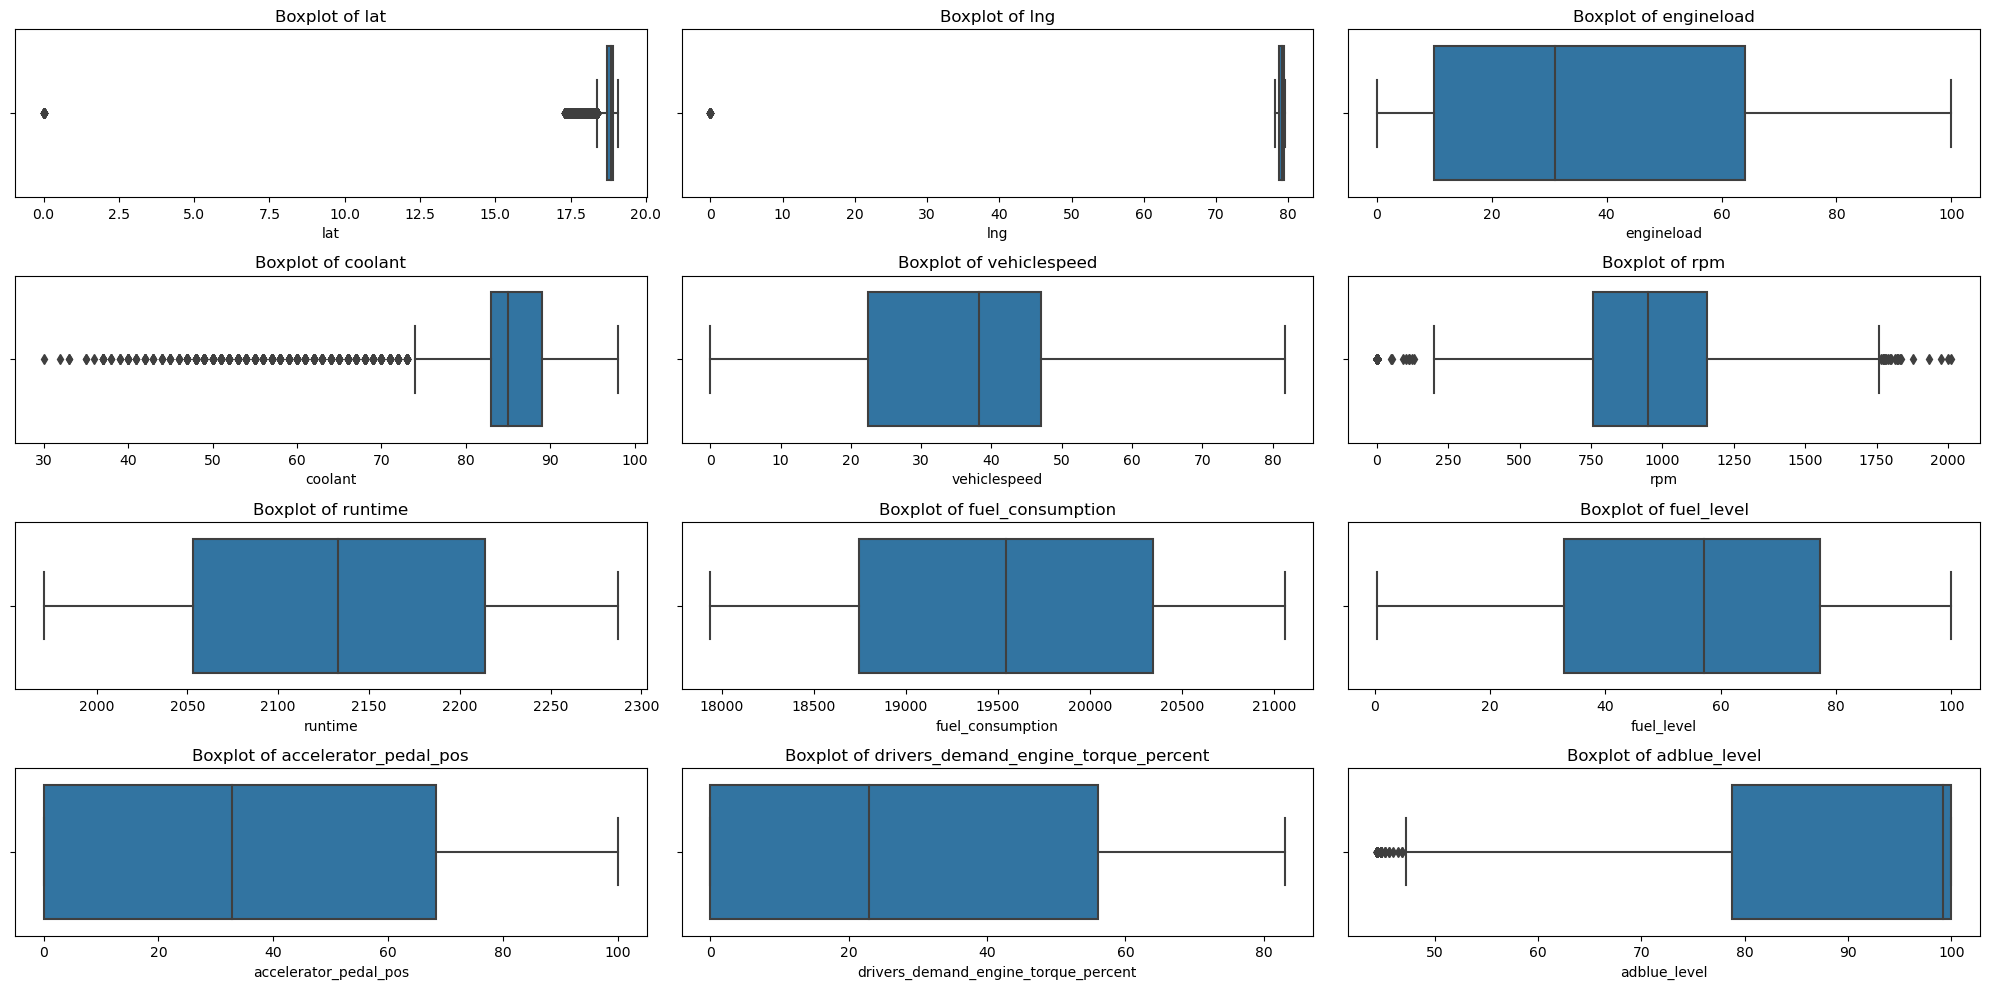

In [26]:
# visualizing distributions using boxplots
plt.figure(figsize=(20, 10))
for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=ds[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

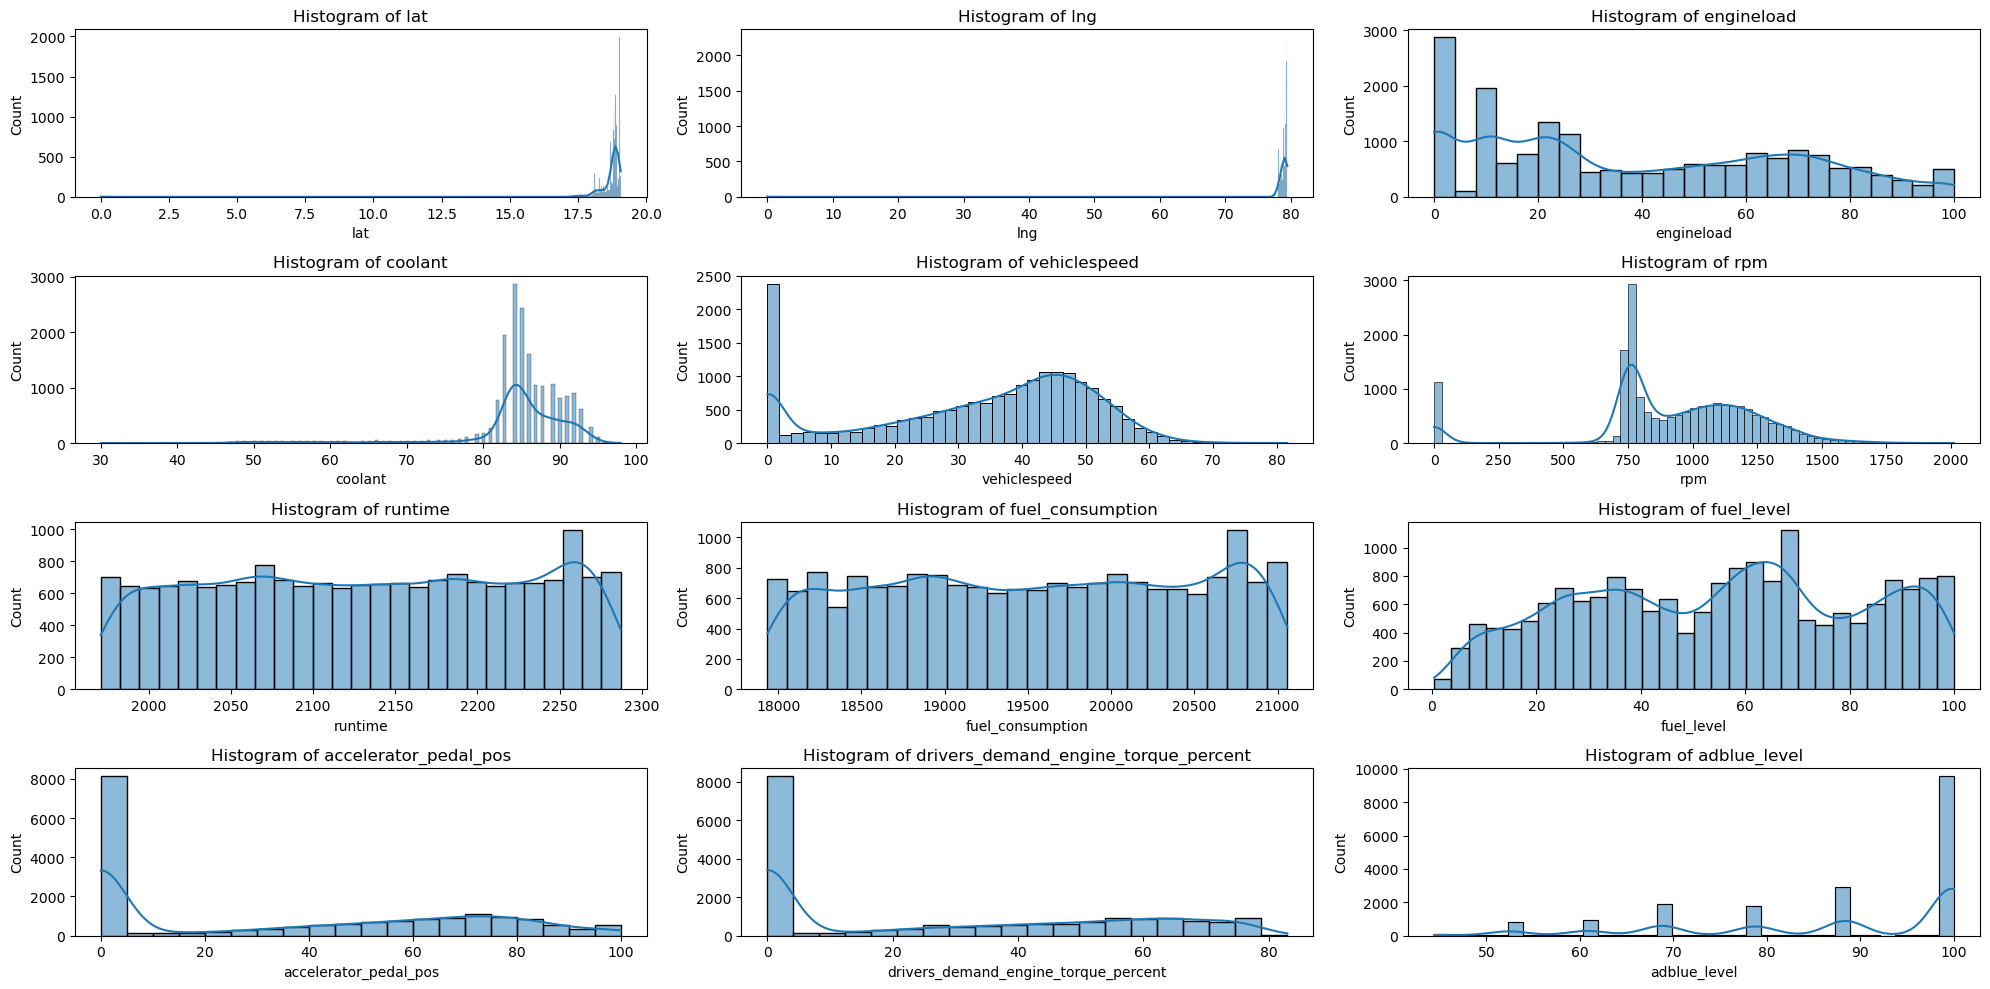

In [27]:
# visualizing distributions using histograms
plt.figure(figsize=(20, 10))
for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(4, 3, i)
    sns.histplot(ds[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

**Inference:** The histograms and box plots reveal the presence of outliers across multiple parameters, `lat`, `lng`, `coolant`, `rpm`, and `adblue_level` displaying particularly pronounced outlier behavior. These anomalies could be indicative of unusual driving conditions, sensor inaccuracies, or edge cases in vehicle performance. To address these outliers and ensure more robust analysis, I removed these outliers using the IQR method. This removal led to more consistent distributions, confirming the effectiveness of this approach and ensuring a focus on typical vehicle operations.

In [28]:
# list of columns to remove outliers from
columns_to_remove_outliers = ['lat', 'lng', 'coolant', 'rpm', 'adblue_level']

In [29]:
# function to remove the outliers
def remove_outliers_iqr(ds, column):
    Q1 = ds[column].quantile(0.25)
    Q3 = ds[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame
    filtered_ds = ds[(ds[column] >= lower_bound) & (ds[column] <= upper_bound)]
    
    return filtered_ds

In [30]:
# apply the outlier removal for each column
for column in columns_to_remove_outliers:
    ds = remove_outliers_iqr(ds, column)

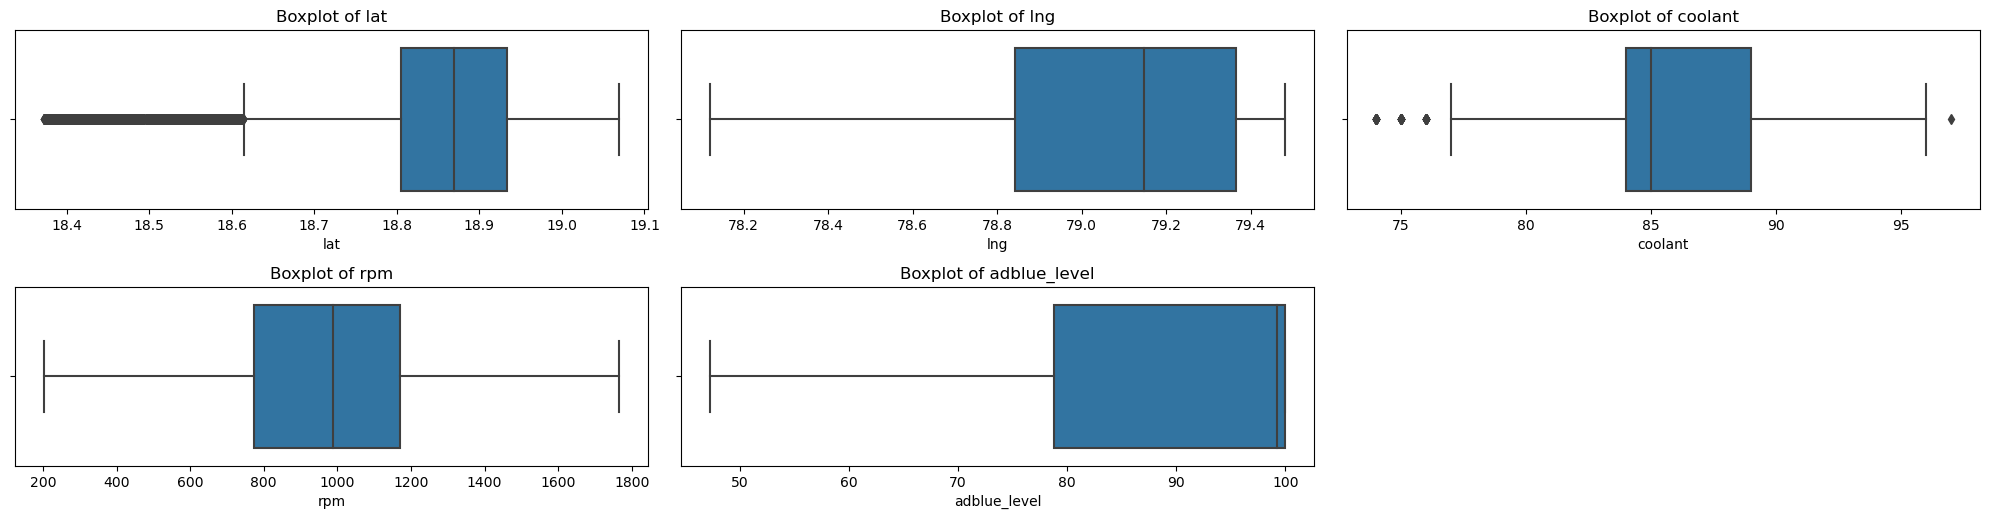

In [31]:
# visualize the box plots after removing outliers
plt.figure(figsize=(20, 10))
for i, col in enumerate(columns_to_remove_outliers, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=ds[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

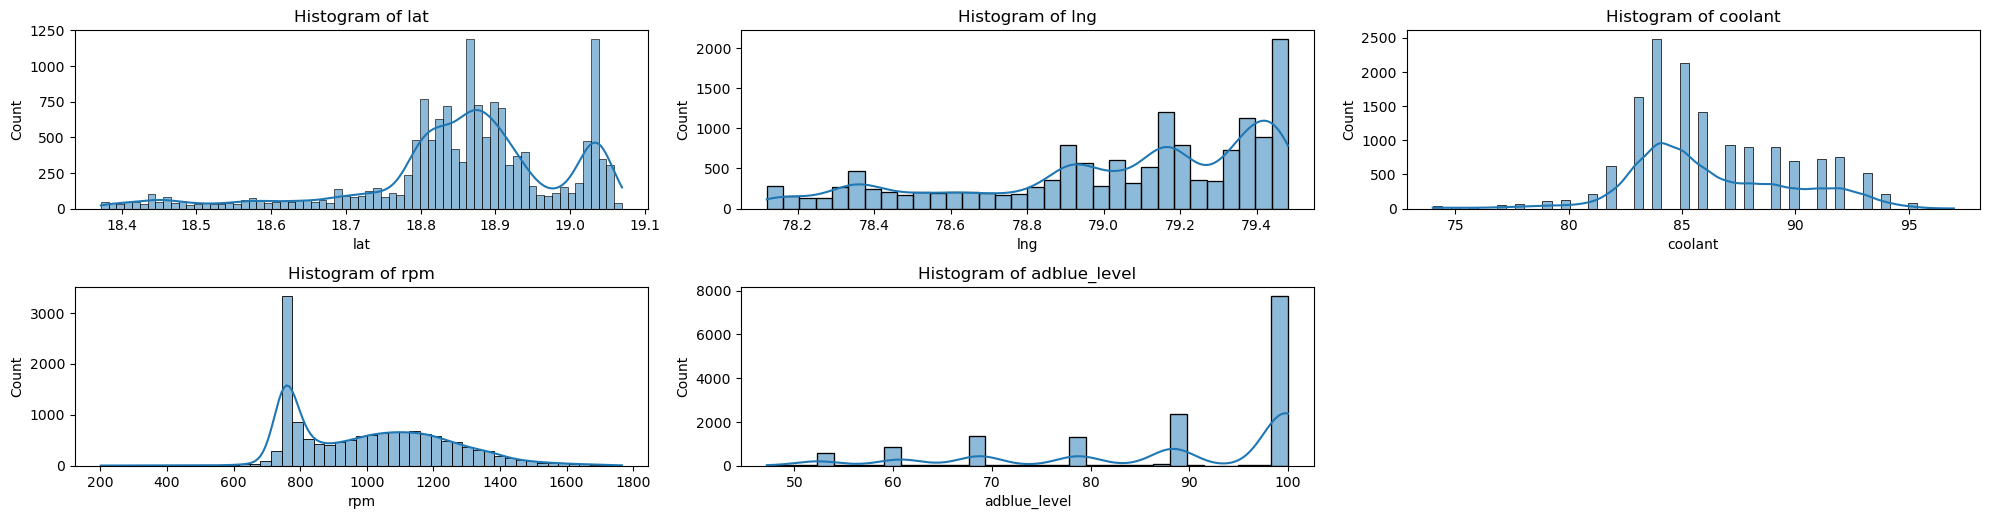

In [32]:
# visualize the histogram after removing outliers
plt.figure(figsize=(20, 10))
for i, col in enumerate(columns_to_remove_outliers, 1):
    plt.subplot(4, 3, i)
    sns.histplot(ds[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

### Exploratory Data Analysis

In [33]:
ds.columns

Index(['uniqueid', 'ts', 'lat', 'lng', 'engineload', 'coolant',
       'engineoiltemp', 'vehiclespeed', 'rpm', 'obddistance', 'runtime',
       'engine_torque_percent', 'selected_gear', 'current_gear',
       'fuel_consumption', 'fuel_level', 'fl_level', 'fuel_rate',
       'fuel_economy', 'accelerator_pedal_pos', 'pluscode', 'vibration_status',
       'can_raw_data', 'engine_throttle_valve1_pos',
       'engine_throttle_valve2_pos', 'enginefueltemp',
       'drivers_demand_engine_torque_percent', 'engine_torque_mode',
       'accelerator_pedal_pos_2', 'brake_switch_status',
       'clutch_switch_status', 'parking_switch_status', 'adblue_level'],
      dtype='object')

In [34]:
ds.select_dtypes(include=['object', 'category']).columns.tolist()

['uniqueid',
 'pluscode',
 'can_raw_data',
 'brake_switch_status',
 'clutch_switch_status',
 'parking_switch_status']

- The `uniqueid`, `pluscode`, and `can_raw_data` columns have been identified as insignificant for the analysis. These columns will be removed to streamline the dataset and focus on more relevant features.

In [35]:
ds.drop(['uniqueid', 'pluscode','can_raw_data'], axis=1, inplace=True)

In [36]:
ds.head()

,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,selected_gear,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,vibration_status,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
43,1709352957,19.055548,78.352646,68,77,1774.9688,13.890625,682.375,60783036,1971.15,33,130,13,17937.0,19.6,71.54,8.85,1.513672,42.0,0,100.0,102,215,36,1,102,Released,Pressed,Released,100.0
44,1709353021,19.052660,78.353394,39,82,1774.9688,17.906250,1136.750,60783404,1971.15,30,130,11,17937.5,21.2,77.38,8.95,1.925781,52.4,0,100.0,102,215,41,9,102,Released,Pressed,Released,100.0
45,1709353085,19.048927,78.353806,37,86,1774.9688,36.750000,926.750,60783796,1971.20,28,130,17,17937.5,23.2,84.68,8.50,4.314453,43.6,0,100.0,102,215,36,9,102,Released,Pressed,Released,100.0
46,1709353149,19.043056,78.353966,35,84,1774.9688,44.015625,1153.125,60784404,1971.20,27,130,16,17937.5,27.6,100.74,9.90,4.582031,39.2,0,100.0,102,215,28,2,102,Released,Pressed,Released,100.0
47,1709353214,19.037655,78.358025,51,83,1774.9688,42.531250,1074.000,60785240,1971.20,38,130,16,17938.0,21.2,77.38,11.35,3.748047,50.4,0,99.6,102,215,39,2,102,Released,Pressed,Released,100.0


#### Univariate Analysis

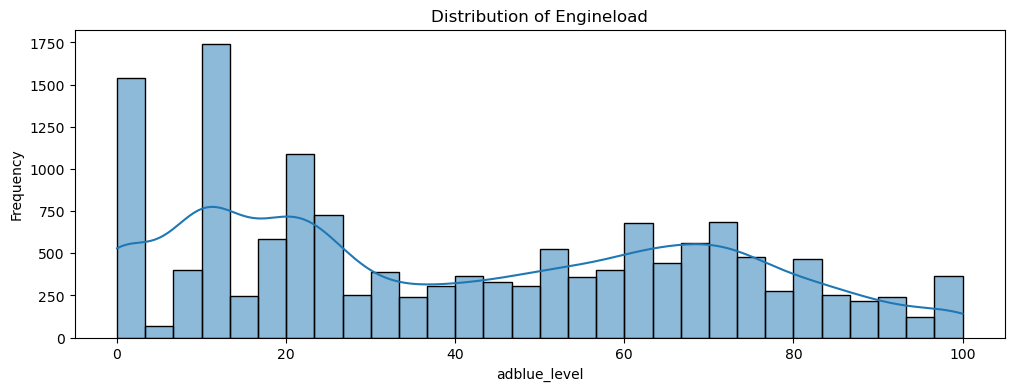

In [37]:
# perform univariate analysis for numerical variables

# analyze 'engineload'

plt.figure(figsize=(12, 4))
sns.histplot(ds['engineload'], kde=True, bins=30)
plt.title(f'Distribution of Engineload')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

**Inference:** The analysis of the "Distribution of Engineload" plot reveals a trend where lower `adblue_level` values are associated with higher engine load frequencies, with a noticeable peak at the lower end of the `adblue_level` scale. This suggests an inverse relationship between `adblue_level` and `engineload`, indicating that engines may experience increased load or work harder when AdBlue levels are low.

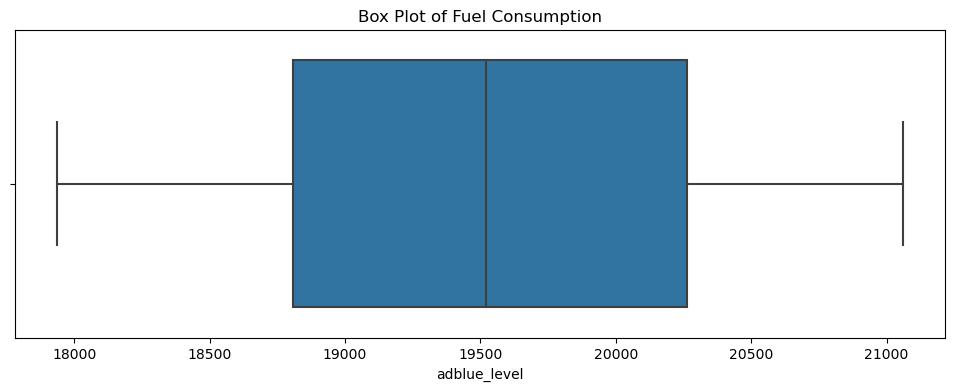

In [38]:
# analyze 'fuel_consumption'

plt.figure(figsize=(12, 4))
sns.boxplot(x=ds['fuel_consumption'])
plt.title(f'Box Plot of Fuel Consumption')
plt.xlabel(column)
plt.show()

**Inference**: The "Box Plot of Fuel Consumption" illustrates that fuel consumption predominantly falls within a narrow range, centered around a median adblue_level of 19,750. The data shows limited variability, with no outliers, indicating a consistent fuel consumption pattern across the observed adblue levels. This suggests that significant deviations in fuel consumption are uncommon within this dataset for the given adblue levels.

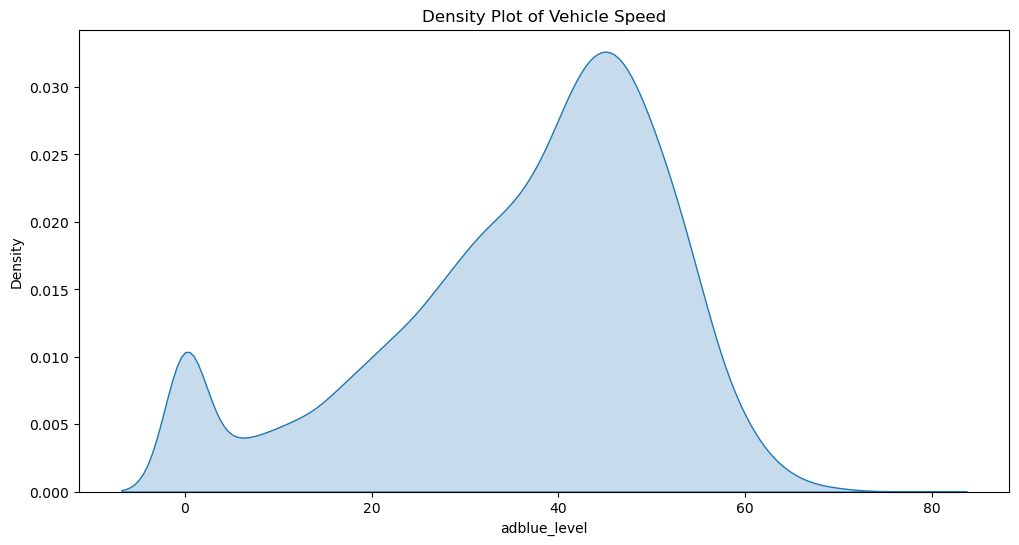

In [39]:
# analyze 'vehiclespeed'

plt.figure(figsize=(12, 6))
sns.kdeplot(ds['vehiclespeed'], shade=True)
plt.title(f'Density Plot of Vehicle Speed')
plt.xlabel(column)
plt.ylabel('Density')
plt.show()

**Inference**: The "Density Plot of Vehicle Speed" reveals two main speed ranges where vehicles commonly operate, with the highest density around 35 units and a secondary peak at 10 units. This pattern likely reflects different driving conditions, such as city driving at lower speeds and highway driving at moderate speeds. The smaller peak near 60 units indicates a less frequent, but still significant, speed range, suggesting that some vehicles occasionally travel at higher speeds within this dataset.

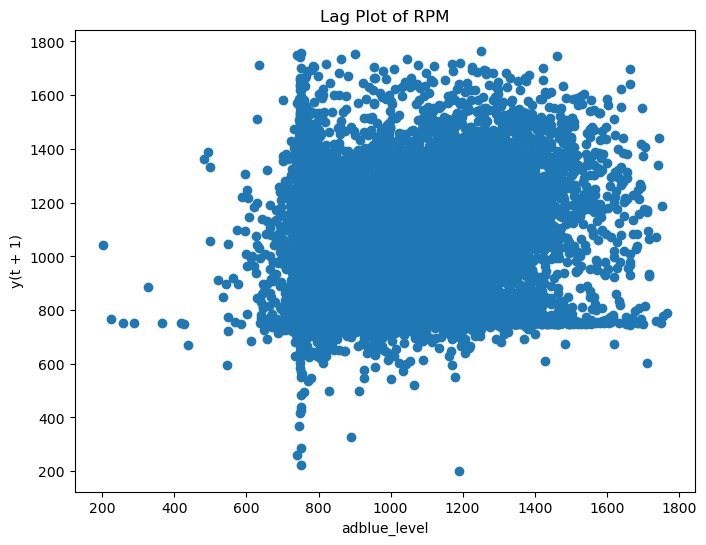

In [40]:
# analyze 'rpm'

plt.figure(figsize=(8, 6))
pd.plotting.lag_plot(ds['rpm'])
plt.title(f'Lag Plot of RPM')
plt.xlabel(column)
plt.show()

**Inference**: The Lag plot suggests no clear linear relationship between `adblue_level` and `y(t) + 1`, as the data points are densely clustered with no discernible pattern. This lack of a straightforward correlation indicates that changes in AdBlue level do not directly influence RPM (if y(t) represents RPM). The relationship may be complex or affected by other factors not captured in this plot, suggesting the need for further analysis to uncover underlying patterns.

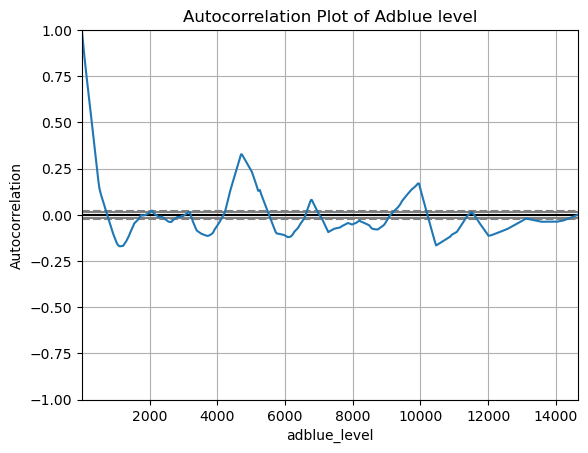

In [41]:
# analyze 'adblue_level'

pd.plotting.autocorrelation_plot(ds['adblue_level'])
plt.title(f'Autocorrelation Plot of Adblue level')
plt.xlabel(column)
plt.show()

**Inference**: The "Autocorrelation Plot of AdBlue level" reveals a strong initial correlation at lower lags, with a significant peak just above 0.75 and a trough just below -0.75. However, this autocorrelation rapidly diminishes as the lag increases, with values fluctuating around zero at higher lags. This pattern indicates that while AdBlue levels are somewhat predictable in the short term, their dependence on past values quickly weakens, making them relatively unpredictable over longer time intervals.

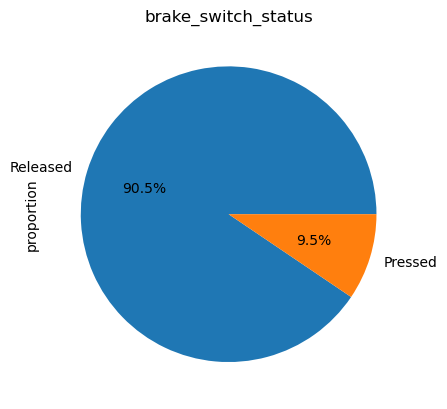

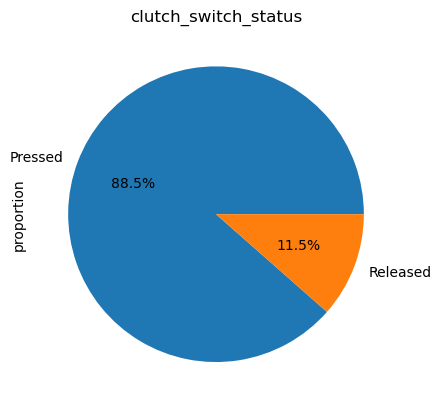

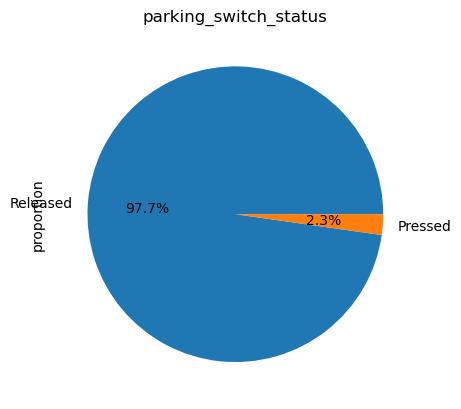

In [42]:
# analyze 'brake_switch_status', 'clutch_switch_status' & 'parking_switch_status' columns
cat_cols = ['brake_switch_status', 'clutch_switch_status', 'parking_switch_status']

# loop through each column and plot the pie chart
for column in cat_cols:
    ds[column].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', title=column)
    plt.show()

**Inference Summary**:

- **Brake Switch Status**: The brake switch is in the "Released" position 90.5% of the time, indicating minimal braking activity. This suggests that driving conditions often do not require frequent braking, potentially reflecting efficient driving practices that could enhance fuel economy and reduce brake wear.

- **Clutch Switch Status**: The clutch switch is in the "Pressed" position 88.5% of the time, suggesting that the clutch is engaged for most of the operation. This implies frequent use or a system design that requires the clutch to remain pressed for extended periods.

- **Parking Switch Status**: The parking switch is in the "Released" position 97.7% of the time, indicating that it is rarely activated. This suggests infrequent need for parking activation or extended periods of inactivity between uses.

#### Bivariate Analysis

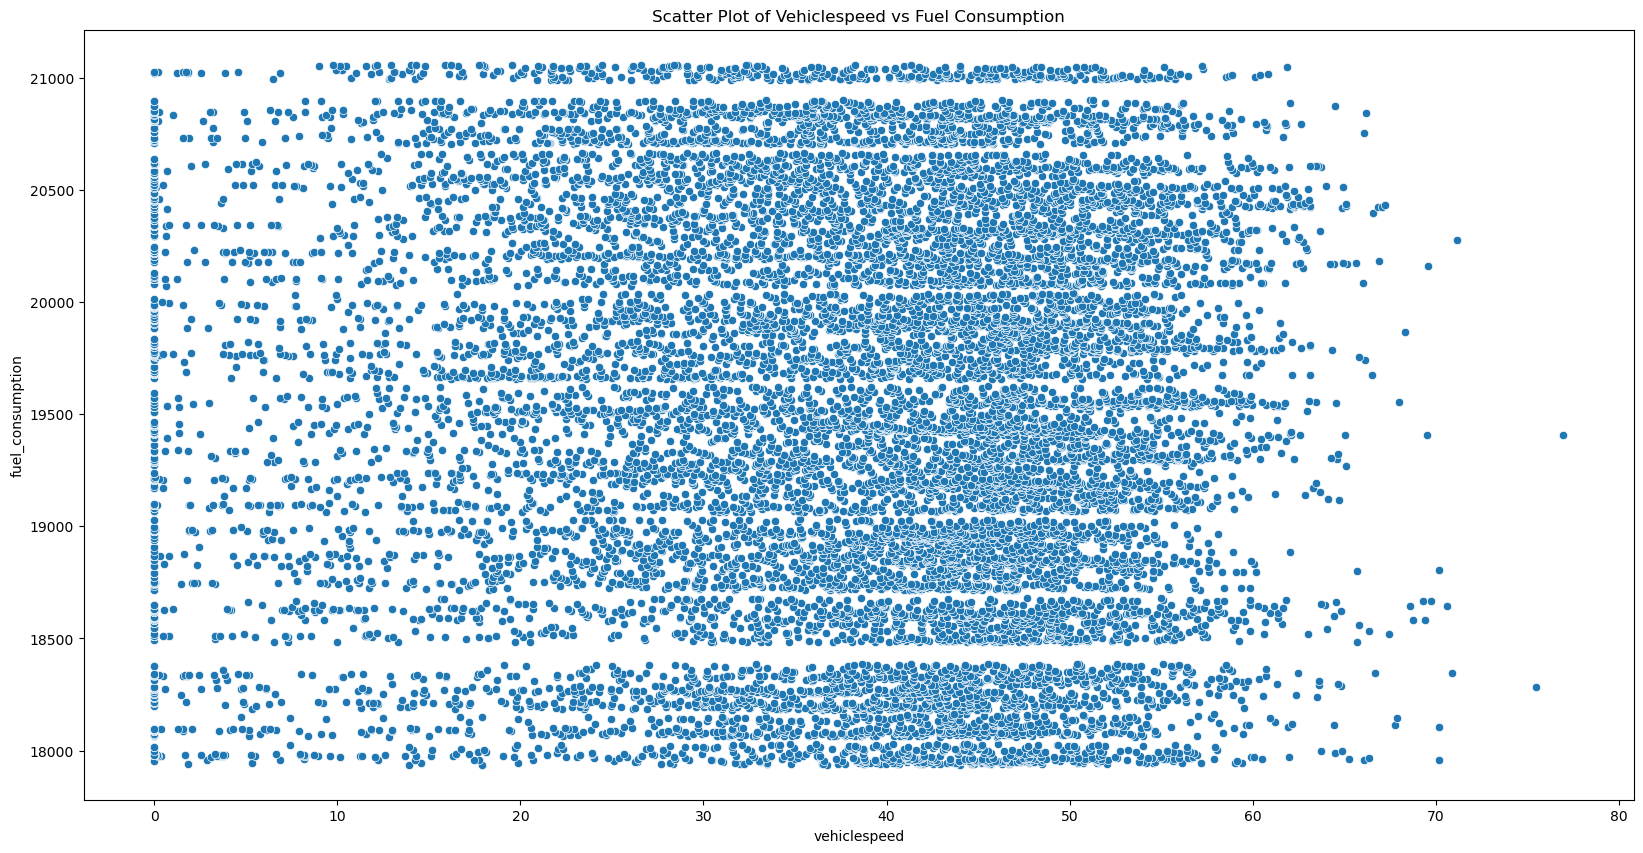

In [43]:
# analyze 'vehiclespeed' & 'fuel_consumption'

plt.figure(figsize=(20, 10))
sns.scatterplot(x='vehiclespeed',y='fuel_consumption',data=ds[ds['vehiclespeed'] < 1000])
plt.title(f'Scatter Plot of Vehiclespeed vs Fuel Consumption')
plt.show()

**Inference**: The "Scatter Plot of Vehicle Speed vs Fuel Consumption" reveals a wide distribution of data points, indicating no clear correlation between vehicle speed and fuel consumption. This suggests that, within the observed speed range, vehicle speed does not have a significant impact on fuel consumption in this dataset.

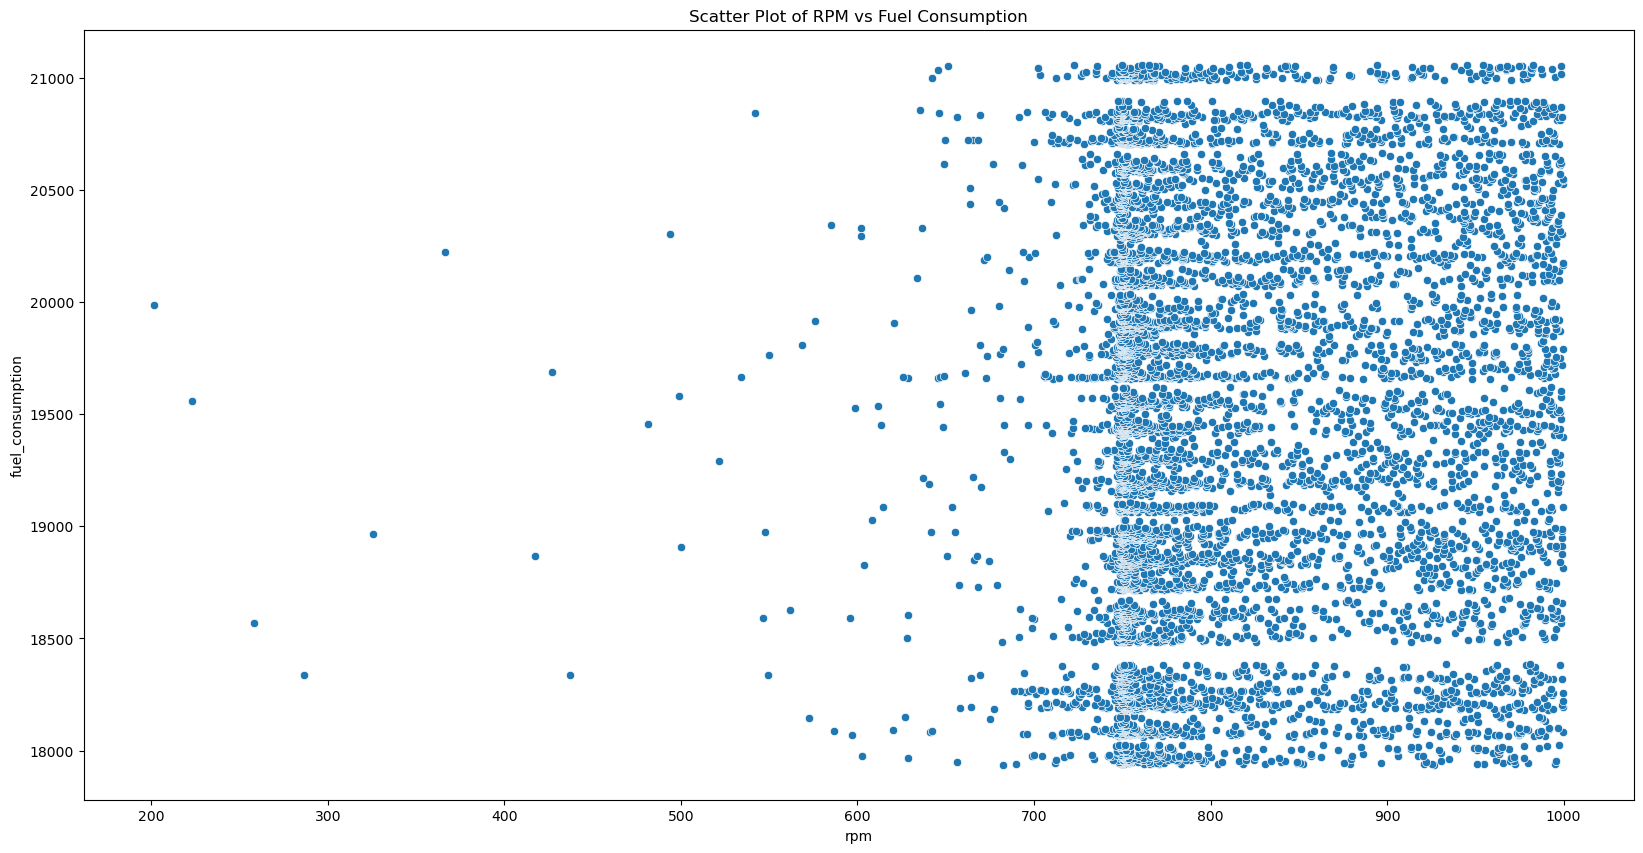

In [44]:
# analyze 'rpm' & 'fuel_consumption'

plt.figure(figsize=(20, 10))
sns.scatterplot(x='rpm',y='fuel_consumption',data=ds[ds['rpm'] < 1000])
plt.title(f'Scatter Plot of RPM vs Fuel Consumption')
plt.show()

**Inference**: The "Scatter plot of RPM vs Fuel Consumption" suggests a general trend where fuel consumption tends to increase with higher RPMs, indicating that higher engine speeds typically lead to greater fuel usage. However, the variability in data points at higher RPMs suggests that other factors may also play a role in influencing fuel consumption.

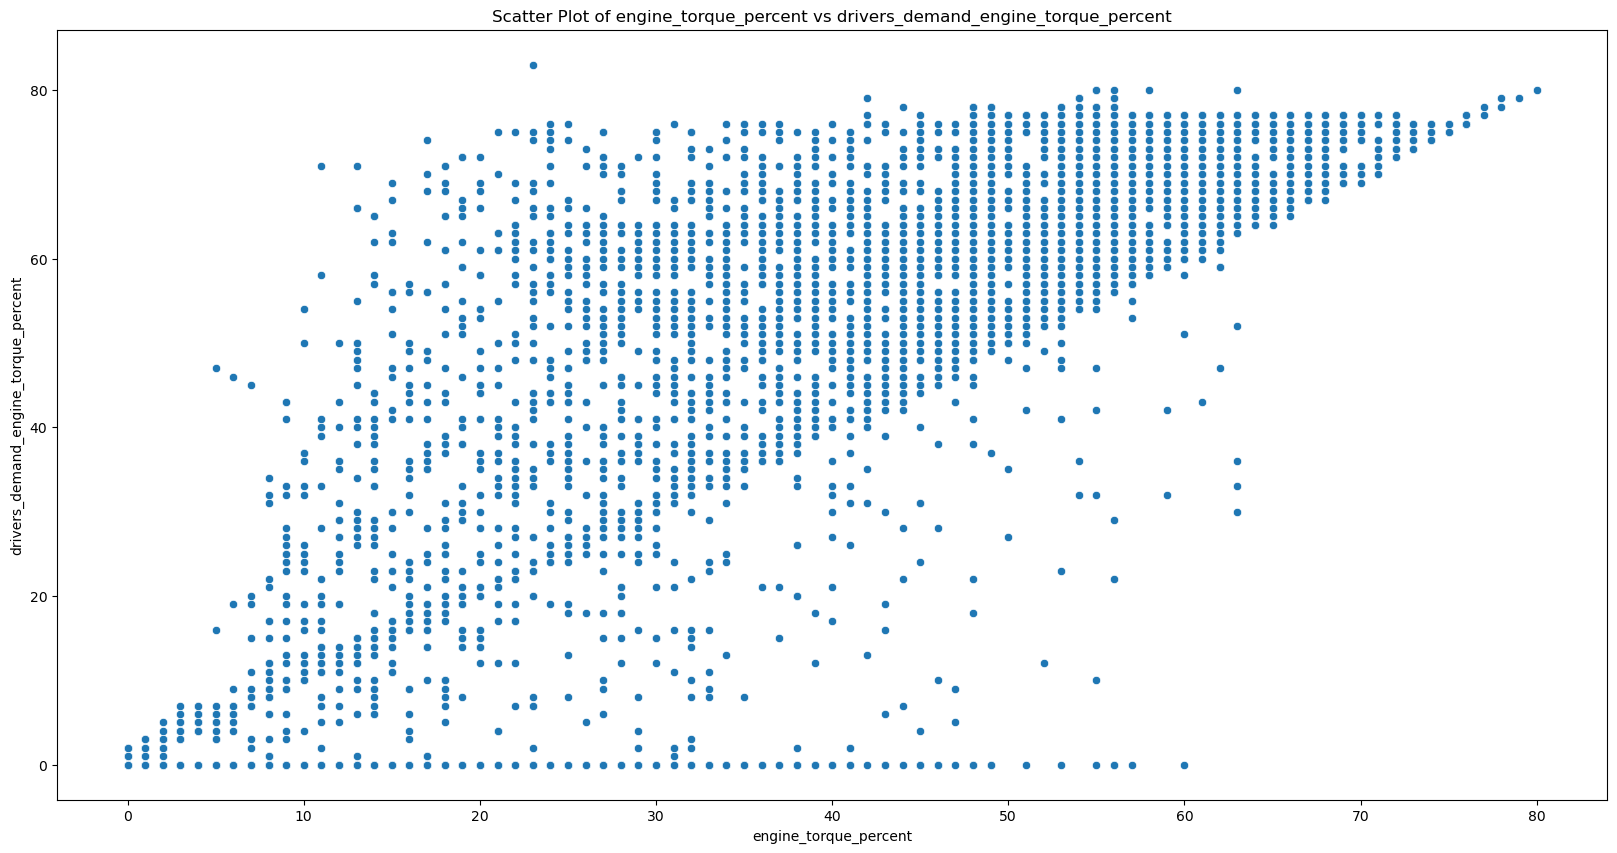

In [45]:
# analyze variables 'engine_torque_percent' & 'drivers_demand_engine_torque_percent'

plt.figure(figsize=(20, 10))
sns.scatterplot(x='engine_torque_percent',y='drivers_demand_engine_torque_percent',data=ds[ds['engine_torque_percent'] < 1000])
plt.title(f'Scatter Plot of engine_torque_percent vs drivers_demand_engine_torque_percent')
plt.show()

**Inference**: The scatter plot shows a positive correlation between engine torque percent and drivers' demand for engine torque percent, indicating that as available engine torque increases, drivers tend to demand more of it. This suggests that higher performance engines encourage drivers to utilize more of the available power.

<Figure size 800x600 with 0 Axes>

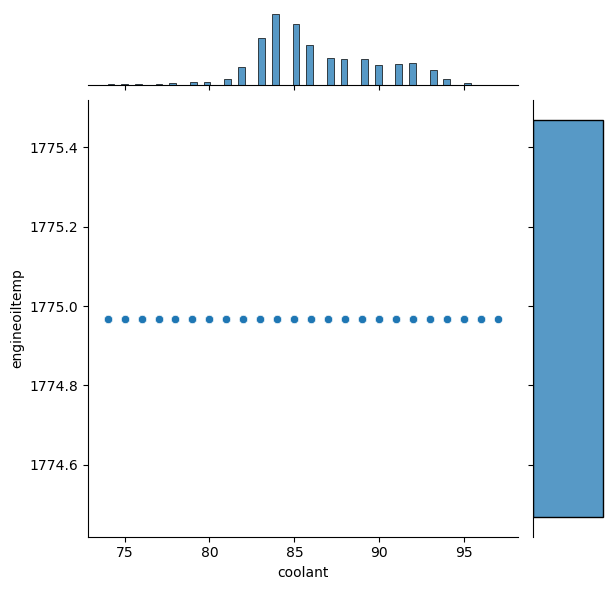

In [46]:
# analyze 'coolant' and 'engineoiltemp'

plt.figure(figsize=(8, 6))
sns.jointplot(x='coolant', y='engineoiltemp', data=ds)
plt.show()

**Inference**: The scatter plot combined with the histogram indicates that engine temperature remains constant across a range of coolant values, as evidenced by the horizontal distribution of data points and the histogram's peak at a single temperature value. This suggests that, within the observed range, changes in coolant levels do not significantly affect engine temperature. Alternatively, this pattern might indicate a data collection issue, where all readings are recorded at the same constant temperature level.

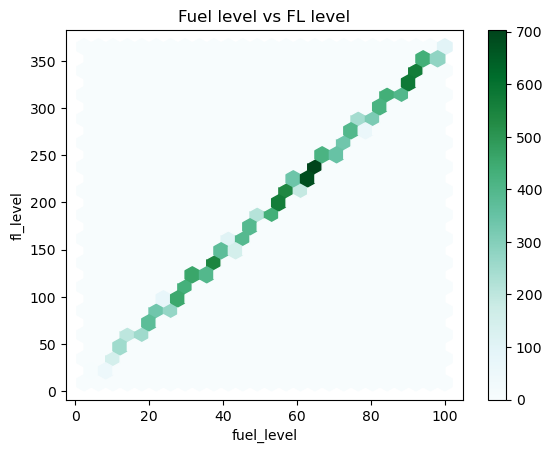

In [47]:
# analyze 'fuel_level' and 'fl_level'

ds.plot.hexbin(x='fuel_level', y='fl_level', gridsize=25)
plt.title('Fuel level vs FL level')
plt.show()

**Inference**: The hexbin plot titled “Fuel Level vs FL Level” shows a positive correlation between `fuel_level` and `fl_level`, with both variables increasing together from 0 to their respective maximums (100 for `fuel_level` and 350 for `fl_level`). The varying shades of green, which represent a third variable, indicate that higher `fuel_level` and `fl_level` are associated with higher values of this variable. Darker shades of green correspond to higher values, suggesting that the third variable also increases with `fuel_level` and `fl_level`.

#### Correlation

In [48]:
# select the key columns
key_columns = ['vehiclespeed', 'engineload', 'fuel_consumption', 'rpm', 'coolant', 'engineoiltemp', 'fuel_level', 'fl_level',
               'adblue_level', 'engine_torque_percent', 'drivers_demand_engine_torque_percent']

In [ ]:
# pairplots for numerical variables
plt.figure(figsize=(12, 10))
sns.pairplot(ds[key_columns])
plt.show()

**Inference Summary for Pair Plot**:

- **Correlations**: Identify strong positive or negative correlations between variables. For example, if one variable increases as another increases, it signifies a positive correlation.

- **Clusters**: Look for clusters of data points that group together, which may suggest distinct patterns or groups within the dataset.

- **Outliers**: Detect any outliers that deviate significantly from general trends, as they could indicate anomalies or special cases.

- **Distributions**: Examine the histograms on the diagonal to assess the distribution of individual variables, noting characteristics such as skewness or multimodality.

In [ ]:
# heatmap of correlation matrix for numerical variables
plt.figure(figsize=(12, 10))
corr_matrix = ds[key_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Variables')
plt.show()

**Inference Summary from Correlation Matrix**:

- **Strong Positive Correlation**: There is a high positive correlation (0.83) between ‘Vehicle Speed’ and ‘Engine Load,’ indicating that as vehicle speed increases, engine load tends to increase as well.

- **Negative Correlation**: A negative correlation (around -0.5) between ‘Fuel Consumption’ and ‘Fuel Level’ suggests that higher fuel consumption is associated with lower fuel levels.

- **Moderate Correlation**: ‘Engine Torque Level’ and ‘Driver’s Demand Engine Torque Percentage’ show a moderate positive correlation, indicating a relationship between the driver’s demand for torque and the actual engine torque.

These insights can assist in optimizing vehicle performance and fuel efficiency.

### Feature Engineering

In [ ]:
# create new features
ds['fuel_efficiency_ratio'] = ds['fuel_consumption'] / ds['vehiclespeed']
ds['torque_utilization'] = ds['engine_torque_percent'] / ds['drivers_demand_engine_torque_percent']

In [ ]:
# assuming a baseline temperature for engineoiltemp
baseline_temperature = 75  
ds['temperature_range'] = ds['engineoiltemp'] - baseline_temperature

In [ ]:
ds['braking_intensity'] = (ds['brake_switch_status'] == 'Pressed').astype(int) * ds['vehiclespeed']

In [ ]:
ds['clutch_engagement_time'] = (ds['clutch_switch_status'] == 'Pressed').astype(int) * 100

In [ ]:
# let's check the dataframe after changes
ds.head()

**Normalizing Features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Features to normalize
features_to_normalize = ['engineload', 'coolant', 'engineoiltemp', 'vehiclespeed', 'rpm', 
                         'obddistance', 'runtime', 'engine_torque_percent', 'fuel_consumption', 
                         'fuel_level', 'fl_level', 'fuel_rate', 'fuel_economy', 
                         'accelerator_pedal_pos', 'engine_throttle_valve1_pos', 
                         'engine_throttle_valve2_pos', 'enginefueltemp', 
                         'drivers_demand_engine_torque_percent', 'accelerator_pedal_pos_2', 
                         'adblue_level']

min_max_scaler = MinMaxScaler()
ds[features_to_normalize] = min_max_scaler.fit_transform(ds[features_to_normalize])

**Summary of Key Insights:**

- **Vehicle Speed and Engine Load:** High positive correlation indicates that increased vehicle speed is associated with higher engine load. Efficient speed management could optimize engine performance.

- **Fuel Consumption and Fuel Level:** The negative correlation suggests that higher fuel consumption results in lower fuel levels. Monitoring and managing fuel consumption can help in maintaining adequate fuel levels.

- **Engine Torque and Driver’s Demand:** A moderate positive correlation indicates that higher engine torque is often demanded by the driver. Matching engine performance with driver expectations can enhance driving experience.

- **Brake and Clutch Status:** High percentage of brake switch in the "Released" position and clutch switch in the "Pressed" position suggests typical driving conditions and frequent use of clutch.

- **Engine Temperature Consistency:** Little variation in engine temperature across different coolant levels might indicate stable engine conditions or data collection issues.

**Recommendations:**

- **Optimize Vehicle Speed:** Consider implementing speed management systems or driver training programs to optimize engine load and fuel efficiency.

- **Improve Fuel Efficiency:** Enhance fuel management strategies and consider features that adjust fuel consumption based on driving patterns to maintain fuel levels.

- **Match Torque to Demand:** Adjust engine settings to better align with driver demand for torque, potentially improving performance and driving comfort.

- **Monitor Braking and Clutch Use:** Regularly check brake and clutch systems to ensure they are functioning properly and to prevent excessive wear.

- **Address Engine Temperature Monitoring:** Ensure accurate engine temperature monitoring and adjust coolant management systems to maintain optimal engine performance.